# Numpy 

Fundamental building block of scientific Python.
* Main attraction: Powerful and highly flexible array object; your new ubiquitous working unit.
* Set of most common mathematical utilities (constants, random numbers, linear algebra functions).

## Import

In [2]:
# imports
import numpy as np                 # It will be used a lot, so the shorthand is helpful.
import matplotlib.pyplot as plt    # Same here.
%matplotlib inline

## Numpy array basics

Every numpy array has some basic values that denote its format. Note that numpy array **cannot** change their size once they are created, but they **can** change their shape, i.e., an array will always hold the same number of elements, but their organization into rows and columns may change as desired.
* **ndarray.ndim:** The number of axes/dimensions of an array. The default matrix used for math problems is of dimensionality 2.
* **ndarray.shape:** A tuple of integers indicating the size of an array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the rank, or number of dimensions, ndim. 
* **ndarray.size:** The total number of elements of the array. This is equal to the product of the elements of shape. 
* **ndarray.dtype:** The data type of the array elements. Defaults to 64 bit floating point values and can be set when the array is created.

(*see:* [Numpy basics](http://wiki.scipy.org/Tentative_NumPy_Tutorial#head-6a1bc005bd80e1b19f812e1e64e0d25d50f99fe2))

In [3]:
m = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]], dtype=np.int32) # np.float32, np.float64, np.complex64, np.complex128
print(m)
print(m.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


### Under the hood
* Numpy arrays believe in sharing is caring and will share their data with other arrays. Slicing does NOT return a new array, but instead a *view* on the data of another array:

In [4]:
s = m[1]
print('BEFORE')
print(s, 'slice', '\n')
print(m, '\n')
s[0] = 0
print('AFTER')
print(s, 'slice' '\n')
print(m, '\n')

BEFORE
[4 5 6] slice 

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

AFTER
[0 5 6] slice

[[1 2 3]
 [0 5 6]
 [7 8 9]] 



* You can check whether an array actually owns its data by looking at its flags (you should understand *both* differences in the two flag settings):

In [5]:
print(m.flags)
print(s.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


## Array creation

In [6]:
# helper function for examples below; plots the graphical depiction of a given numpy array
def showMatrix(X):
    Y = np.array(np.array(X, ndmin=2))  # 1D -> 2D
    vmin = min(np.min(Y), 0)
    vmax = max(np.max(Y), 1)
    plt.imshow(Y, interpolation='none', vmin=vmin, vmax=vmax, cmap=plt.cm.get_cmap('Blues'))

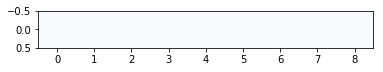

In [7]:
Z = np.zeros(9)
showMatrix(Z)

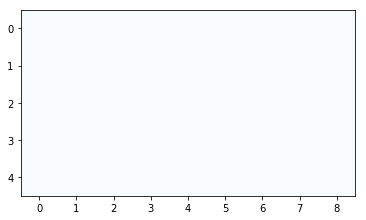

In [8]:
Z = np.zeros((5,9))
showMatrix(Z)

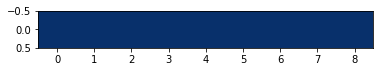

In [9]:
Z = np.ones(9)
showMatrix(Z)

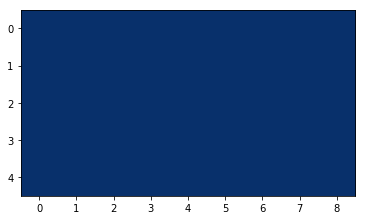

In [10]:
Z = np.ones((5,9))
showMatrix(Z)

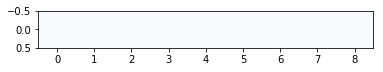

In [11]:
Z = np.array( [0,0,0,0,0,0,0,0,0] )
showMatrix(Z)

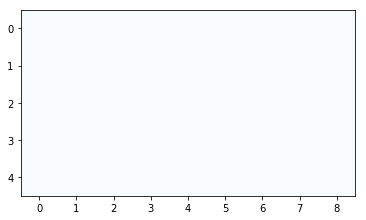

In [12]:
Z = np.array( [[0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0]] )
showMatrix(Z)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

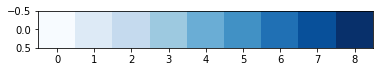

In [13]:
Z = np.arange(9)    # the numpy arange function also allows floating point arguments
showMatrix(Z)
Z

(*see also:* [linspace](http://wiki.scipy.org/Numpy_Example_List#linspace))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44]])

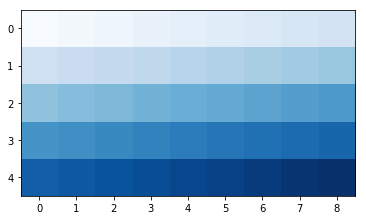

In [14]:
Z = np.arange(5*9).reshape(5,9)
showMatrix(Z)
Z

- Reshape must not change the number of elements within the array.
- A vector of length ***n*** and a matrix of dimensions (1,***n***) ARE NOT THE SAME THING!

array([0.63483178, 0.7215916 , 0.32270822, 0.03753937, 0.20827107,
       0.48935121, 0.71862324, 0.0425977 , 0.66820908])

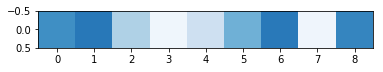

In [15]:
Z = np.random.uniform(0,1,9)  # args: min, max, no. of elements
showMatrix(Z)
Z

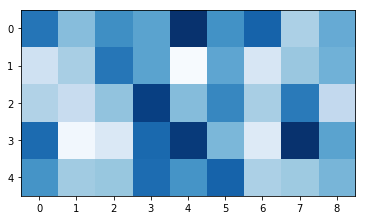

In [16]:
Z = np.random.uniform(0, 1, (5, 9))
showMatrix(Z)

(*see:* [Numpy array creation](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#creation) & [Numpy array reshaping](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#reshaping))

## Array slicing

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

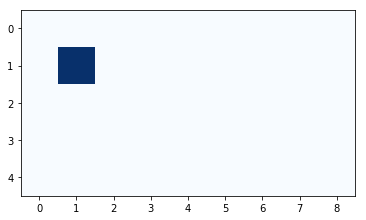

In [17]:
# single element
Z = np.zeros((5, 9))
Z[1,1] = 1
showMatrix(Z)
Z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

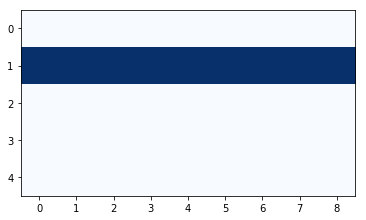

In [18]:
# single row
Z = np.zeros((5, 9))
Z[1,:] = 1
showMatrix(Z)
Z

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.]])

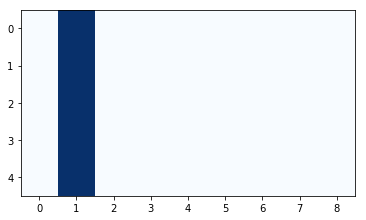

In [19]:
# single column
Z = np.zeros((5, 9))
Z[:,1] = 1
showMatrix(Z)
Z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

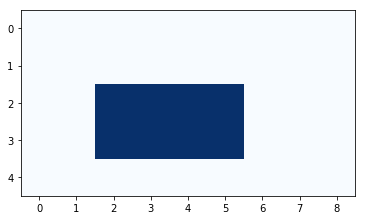

In [20]:
# specific area
Z = np.zeros((5, 9))
Z[2:4,2:6] = 1            # for each dimension format is always: <from:to:step> (with step being optional)
showMatrix(Z)
Z

array([[1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.]])

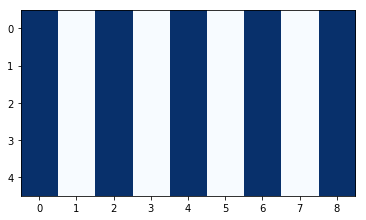

In [21]:
# every second column
Z = np.zeros((5, 9))
Z[:,::2] = 1              # for each dimension format is always: <from:to:step> (with step being optional)
showMatrix(Z)
Z

In [22]:
# indices can be negative
Z = np.arange(10)
print(">>> Z[-1]:  ", Z[-1])       # start indexing at the back
print(">>> Z[3:-3]:", Z[3:-3])     # slice of array center
print(">>> Z[::-1]:", Z[::-1])     # quickly reverse an array
Z

>>> Z[-1]:   9
>>> Z[3:-3]: [3 4 5 6]
>>> Z[::-1]: [9 8 7 6 5 4 3 2 1 0]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(*see:* [Numpy array slicing](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#slicing))

## Broadcasting

Arithmetic operations applied to two Numpy arrays of different dimensions leads to 'broadcasting', i.e., filling up the missing values to allow the operation if possible. This includes:
* Adding/subtracting/etc. a single value to a matrix.
* Adding/subtracting/etc. a column/row vector to a matrix.
* Adding/subtracting/etc. a column and a row vector.

**NOTE:** Multiplying with \* WILL ALSO BE APPLIED elementwise! Use **[np.dot()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)** for actual matrix multiplication!

**FUN FACT:** Truth value checks will also applied elementwise.

(*see:* [Numpy broadcasting](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#broadcasting))

## Exercises
1. Generate a 5x9 matrix of random integers between 0 and 10.
2. Select a tile-pattern subset of the matrix like this:
![Tile pattern](http://i.imgur.com/Cs7N10t.png)
3. ..and like this:
![Tile pattern](http://i.imgur.com/BnGdHle.png)
4. ..and also like this:
![Tile pattern](http://i.imgur.com/i3Lw1Zb.png)
5. Adapt the code for No.3 so that it works with matrices of arbitrary dimensions (if it does not already).
6. Write the code that perfoms the operation depicted below ([source](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#broadcasting)). Parameterize your code and use the above utility function to plot the final matrix in dimensions 8x2 and 256x64.
![Broadcast op](http://i.imgur.com/M3kL9we.png)
7. Make a copy of your random matrix.
8. Find an expression that subtracts the column-mean from every row of any given matrix, the shorter the better (one-line is possible). Try the code with the copy of the random matrix.
9. In your original random matrix: 
    1. Reverse the order of the rows of the matrix using a single slice.
    2. Reverse the order of the columns of the matrix using a single slice.
    3. Reverse the order of both the rows and the columns of the matrix using a single slice.
    4. Try evaluation a standard Python conditional on your matrix. Describe the result in one sentence.
    5. Find an expression that checks if ANY value is larger than 7 using numpy's "any"-function.
    6. Find an expression that checks if ALL values are larger than 2 using numpy's "all"-function.
    7. Use a conditional and boolean/mask indexing to index all even values of your matrix.  
    8. Increment all of them by 1.
10. Use numpy's "linspace" function to create a vector of 50 numbers between $-3\pi$ and $3\pi$ in evenly spaced increments.
    1. Display it with the showMatrix function.
    2. Apply a sine function to the vector and display the result.
    3. Apply a square function to the (original) vector and display the result.
    

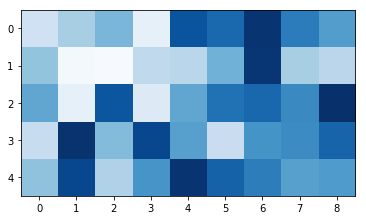

In [23]:
#-#-# EXC_NUMPY: YOUR CODE HERE #-#-#
#exercise-1
Z=np.random.uniform(0,10,45).reshape(5,9)
showMatrix(Z)


## Links
* [Quick reference (types, array handling)](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#quick-references)
* [Tentative numpy tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

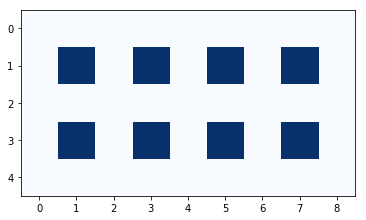

In [24]:
#exercise-2
#Z=np.random.uniform(0,10,45).reshape(5,9)
Z=np.ones(5*9).reshape(5,9)
Z[:,::2] = 0 
Z[::2,:] = 0
showMatrix(Z)
Z

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 9.93173429, 0.        , 8.47212666, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 6.37834757, 0.        , 1.25642046, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

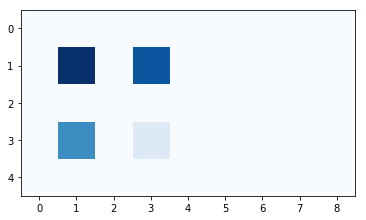

In [25]:
#exercise-3
Z=np.random.uniform(0,10,45).reshape(5,9)
#Z=np.ones(5*9).reshape(5,9)
Z[:,:4:2] = 0
Z[:,4:9] = 0
Z[::2,:] = 0
showMatrix(Z)
Z

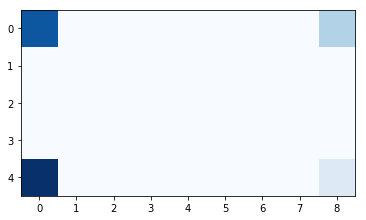

In [26]:
#exercise-4,5
Z=np.random.uniform(0,10,45).reshape(5,9)
#Z=np.ones(5*9).reshape(5,9)
Z[1:np.shape(Z)[0]-1,:]=0
Z[:,1:np.shape(Z)[1]-1]=0
showMatrix(Z)

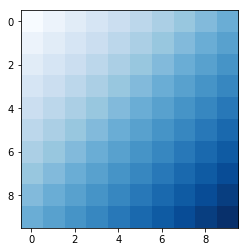

In [40]:
n=10
A=np.arange(n*1).reshape(n,1)
showMatrix(A)
B=np.transpose(A)
showMatrix(B)
D=A+B
# C=np.sum(D,axis=0)
showMatrix(D)

array([[2.09315872, 0.38541786, 5.03752295, 6.9986143 , 2.84472045,
        6.24451993, 8.1810399 , 9.86780978, 9.51870496],
       [4.12623709, 4.62434051, 4.42431348, 7.07918161, 9.9581097 ,
        8.46935354, 7.66508742, 2.25447295, 3.25357066],
       [4.70266062, 7.80966753, 5.17798878, 3.04888837, 1.62696583,
        2.04984894, 0.88869756, 6.83910077, 4.9790431 ],
       [2.30479314, 9.75350987, 5.52143485, 6.34055633, 4.77808481,
        4.68756671, 4.46391677, 5.87291413, 8.17593877],
       [2.76714397, 5.10746984, 3.64116696, 4.93354146, 7.3429982 ,
        1.49053733, 8.76249786, 2.61225194, 3.71290637]])

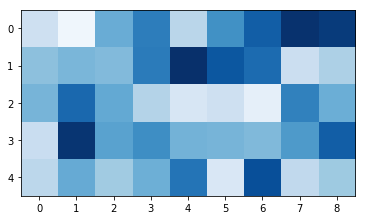

In [28]:
Y=np.random.uniform(0,10,45).reshape(5,9)
showMatrix(Y)
Y

In [29]:
column_mean=np.mean(Y,axis=0)
column_mean
#column_mean.shape

array([3.19879871, 5.53608112, 4.7604854 , 5.68015641, 5.3101758 ,
       4.58836529, 5.9922479 , 5.48930991, 5.92803277])

In [30]:
column_mean_broadcasted= column_mean.reshape(1,9)
#showMatrix(Y-column_mean_broadcasted)
print(Y-column_mean_broadcasted)

[[-1.10563999 -5.15066327  0.27703755  1.31845789 -2.46545534  1.65615464
   2.18879199  4.37849987  3.59067219]
 [ 0.92743838 -0.91174061 -0.33617193  1.3990252   4.6479339   3.88098825
   1.67283952 -3.23483696 -2.67446211]
 [ 1.50386192  2.27358641  0.41750337 -2.63126805 -3.68320997 -2.53851635
  -5.10355034  1.34979085 -0.94898967]
 [-0.89400557  4.21742875  0.76094945  0.66039992 -0.53209099  0.09920142
  -1.52833113  0.38360422  2.24790599]
 [-0.43165473 -0.42861129 -1.11931844 -0.74661496  2.0328224  -3.09782796
   2.77024996 -2.87705797 -2.21512641]]


In [31]:
#one line answer
Y-np.mean(Y,axis=0).reshape(1,9)

array([[-1.10563999, -5.15066327,  0.27703755,  1.31845789, -2.46545534,
         1.65615464,  2.18879199,  4.37849987,  3.59067219],
       [ 0.92743838, -0.91174061, -0.33617193,  1.3990252 ,  4.6479339 ,
         3.88098825,  1.67283952, -3.23483696, -2.67446211],
       [ 1.50386192,  2.27358641,  0.41750337, -2.63126805, -3.68320997,
        -2.53851635, -5.10355034,  1.34979085, -0.94898967],
       [-0.89400557,  4.21742875,  0.76094945,  0.66039992, -0.53209099,
         0.09920142, -1.52833113,  0.38360422,  2.24790599],
       [-0.43165473, -0.42861129, -1.11931844, -0.74661496,  2.0328224 ,
        -3.09782796,  2.77024996, -2.87705797, -2.21512641]])

In [32]:
#exercise - 9
#in your original random matrix: 
#Reverse the order of the rows of the matrix using a single slice.
Y[ ::-1,:]

array([[2.76714397, 5.10746984, 3.64116696, 4.93354146, 7.3429982 ,
        1.49053733, 8.76249786, 2.61225194, 3.71290637],
       [2.30479314, 9.75350987, 5.52143485, 6.34055633, 4.77808481,
        4.68756671, 4.46391677, 5.87291413, 8.17593877],
       [4.70266062, 7.80966753, 5.17798878, 3.04888837, 1.62696583,
        2.04984894, 0.88869756, 6.83910077, 4.9790431 ],
       [4.12623709, 4.62434051, 4.42431348, 7.07918161, 9.9581097 ,
        8.46935354, 7.66508742, 2.25447295, 3.25357066],
       [2.09315872, 0.38541786, 5.03752295, 6.9986143 , 2.84472045,
        6.24451993, 8.1810399 , 9.86780978, 9.51870496]])

In [33]:
#in your original random matrix: 
#Reverse the order of the columns of the matrix using a single slice.
Y[ :,::-1]

array([[9.51870496, 9.86780978, 8.1810399 , 6.24451993, 2.84472045,
        6.9986143 , 5.03752295, 0.38541786, 2.09315872],
       [3.25357066, 2.25447295, 7.66508742, 8.46935354, 9.9581097 ,
        7.07918161, 4.42431348, 4.62434051, 4.12623709],
       [4.9790431 , 6.83910077, 0.88869756, 2.04984894, 1.62696583,
        3.04888837, 5.17798878, 7.80966753, 4.70266062],
       [8.17593877, 5.87291413, 4.46391677, 4.68756671, 4.77808481,
        6.34055633, 5.52143485, 9.75350987, 2.30479314],
       [3.71290637, 2.61225194, 8.76249786, 1.49053733, 7.3429982 ,
        4.93354146, 3.64116696, 5.10746984, 2.76714397]])

In [34]:
Y[ ::-1,::-1]

array([[3.71290637, 2.61225194, 8.76249786, 1.49053733, 7.3429982 ,
        4.93354146, 3.64116696, 5.10746984, 2.76714397],
       [8.17593877, 5.87291413, 4.46391677, 4.68756671, 4.77808481,
        6.34055633, 5.52143485, 9.75350987, 2.30479314],
       [4.9790431 , 6.83910077, 0.88869756, 2.04984894, 1.62696583,
        3.04888837, 5.17798878, 7.80966753, 4.70266062],
       [3.25357066, 2.25447295, 7.66508742, 8.46935354, 9.9581097 ,
        7.07918161, 4.42431348, 4.62434051, 4.12623709],
       [9.51870496, 9.86780978, 8.1810399 , 6.24451993, 2.84472045,
        6.9986143 , 5.03752295, 0.38541786, 2.09315872]])

In [35]:
np.any(Y>7)

True

In [36]:
np.all(Y>2)

False

In [37]:
#Use a conditional and boolean/mask indexing to index all even values of your matrix.
E=np.arange(12).reshape(4,3)
E_even=E[E%2==0]
E_even

array([ 0,  2,  4,  6,  8, 10])

Use numpy's "linspace" function to create a vector of 50 numbers between −3π−3π and 3π3π in evenly spaced increments.

    Display it with the showMatrix function.
    Apply a sine function to the vector and display the result.
    Apply a square function to the (original) vector and display the result

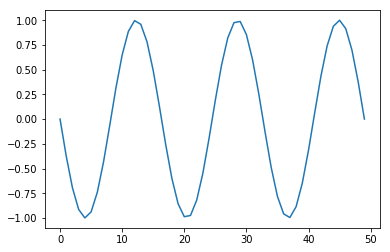

In [38]:
u=np.linspace(-3*np.pi,3*np.pi,50)
plt.plot(np.sin(u))


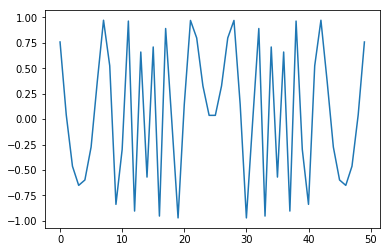

In [39]:
plt.plot( np.sin(np.square(u)) )